In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


577

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kelvington
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | atlantic beach
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 8 of Set 1 | sorong
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | makakilo city
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | bandrele
Processing Record 14 of Set 1 | padang
Processing Record 15 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 1 | mounana
Processing Record 17 of Set 1 | talgar
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | ures
Processing Record 21 of Set 1 | banda aceh
Processing Record 22 of Set 

Processing Record 38 of Set 4 | scarborough
Processing Record 39 of Set 4 | conde
Processing Record 40 of Set 4 | kruisfontein
Processing Record 41 of Set 4 | andros town
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | vanavara
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | haines junction
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | barcelos
Processing Record 49 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 50 of Set 4 | tiksi
Processing Record 1 of Set 5 | portland
Processing Record 2 of Set 5 | warri
Processing Record 3 of Set 5 | kattivakkam
Processing Record 4 of Set 5 | fleet
Processing Record 5 of Set 5 | bang saphan
Processing Record 6 of Set 5 | upernavik
Processing Record 7 of Set 5 | yazd
Processing Record 8 of Set 5 | dzhusaly
City not found. Skipping...
Processing Record 9 of Set 5 | cap malheureux
Processing Record 10 of Se

Processing Record 29 of Set 8 | makat
Processing Record 30 of Set 8 | okhotsk
Processing Record 31 of Set 8 | barquisimeto
Processing Record 32 of Set 8 | baruun-urt
Processing Record 33 of Set 8 | zhangye
Processing Record 34 of Set 8 | anchorage
Processing Record 35 of Set 8 | jawhar
Processing Record 36 of Set 8 | maralal
Processing Record 37 of Set 8 | skoghall
Processing Record 38 of Set 8 | ratnagiri
Processing Record 39 of Set 8 | dharchula
Processing Record 40 of Set 8 | nuuk
Processing Record 41 of Set 8 | norman wells
Processing Record 42 of Set 8 | kudat
Processing Record 43 of Set 8 | sioux lookout
Processing Record 44 of Set 8 | cadillac
Processing Record 45 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 8 | alyangula
Processing Record 47 of Set 8 | talakan
Processing Record 48 of Set 8 | broome
Processing Record 49 of Set 8 | tatawin
Processing Record 50 of Set 8 | cuamba
Processing Record 1 of Set 9 | ondorhaan
City not found. S

Processing Record 18 of Set 12 | ekhabi
Processing Record 19 of Set 12 | alma
Processing Record 20 of Set 12 | karaton
Processing Record 21 of Set 12 | saldanha
Processing Record 22 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 23 of Set 12 | anadyr
Processing Record 24 of Set 12 | ilheus
Processing Record 25 of Set 12 | arcata
Processing Record 26 of Set 12 | hambantota
Processing Record 27 of Set 12 | uusikaupunki
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
len(city_data)

533

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kelvington,52.1667,-103.5343,73.06,52,100,13.35,CA,2021-07-20 21:36:36
1,Ushuaia,-54.8000,-68.3000,35.26,64,75,12.66,AR,2021-07-20 21:35:13
2,Bluff,-46.6000,168.3333,42.80,76,100,11.70,NZ,2021-07-20 21:36:37
3,Kapaa,22.0752,-159.3190,84.18,75,75,5.01,US,2021-07-20 21:36:37
4,Atlantic Beach,30.3344,-81.3987,90.23,69,75,11.50,US,2021-07-20 21:36:38
5,Kodiak,57.7900,-152.4072,60.31,77,90,9.22,US,2021-07-20 21:33:15
6,Sorong,-0.8833,131.2500,78.75,84,91,4.70,ID,2021-07-20 21:36:38
7,Mataura,-46.1927,168.8643,42.48,84,95,3.18,NZ,2021-07-20 21:36:39
8,Makakilo City,21.3469,-158.0858,86.32,57,40,13.80,US,2021-07-20 21:36:39
9,Qaanaaq,77.4840,-69.3632,40.28,74,97,4.21,GL,2021-07-20 21:36:40


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kelvington,CA,2021-07-20 21:36:36,52.1667,-103.5343,73.06,52,100,13.35
1,Ushuaia,AR,2021-07-20 21:35:13,-54.8000,-68.3000,35.26,64,75,12.66
2,Bluff,NZ,2021-07-20 21:36:37,-46.6000,168.3333,42.80,76,100,11.70
3,Kapaa,US,2021-07-20 21:36:37,22.0752,-159.3190,84.18,75,75,5.01
4,Atlantic Beach,US,2021-07-20 21:36:38,30.3344,-81.3987,90.23,69,75,11.50
5,Kodiak,US,2021-07-20 21:33:15,57.7900,-152.4072,60.31,77,90,9.22
6,Sorong,ID,2021-07-20 21:36:38,-0.8833,131.2500,78.75,84,91,4.70
7,Mataura,NZ,2021-07-20 21:36:39,-46.1927,168.8643,42.48,84,95,3.18
8,Makakilo City,US,2021-07-20 21:36:39,21.3469,-158.0858,86.32,57,40,13.80
9,Qaanaaq,GL,2021-07-20 21:36:40,77.4840,-69.3632,40.28,74,97,4.21


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today


1626822569.826709

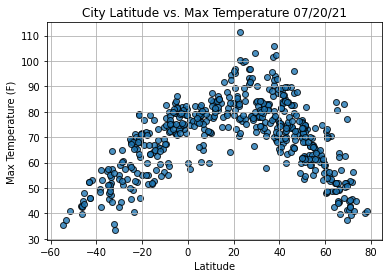

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

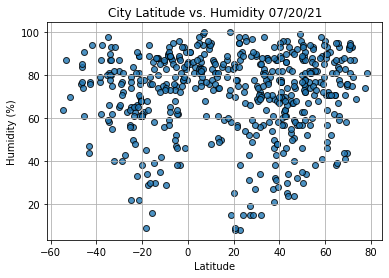

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

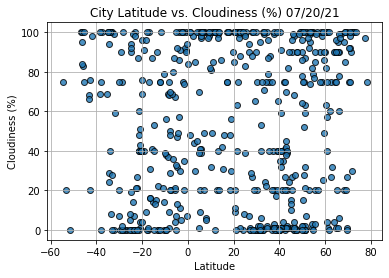

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()